<a href="https://colab.research.google.com/github/janaabunasser14/ENCS5141-INTELLIGENT-SYSTEMS-LAB/blob/main/Manual_ENCS5141_Exp6__Artificial_Neural_Networks_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Example 1: Python code for a binary classifier perceptron with a step activation function and SGD training method. Note that, in SGD, the model parameters are updated after each selected sample.

In [ ]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, learning_rate, epochs):
        # Initialize weights and bias with random values
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()
        # Set learning rate and number of epochs
        self.learning_rate = learning_rate
        self.epochs = epochs

    def step_activation(self, x):
        # Step activation function
        return 1 if x >= 0 else 0

    def predict(self, x):
        # Compute the weighted sum of inputs and bias
        net_input = np.dot(x, self.weights) + self.bias
        # Apply step activation function to the net input
        return self.step_activation(net_input)

    def trainSGD(self, X, y):
        # Training loop
        for epoch in range(self.epochs):
            # Initialize Mean Squared Error for this epoch
            total_mse = 0.0
            # Shuffle the training examples for this epoch
            indices = np.arange(len(X))
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            # Iterate over each shuffled training example
            for i in range(len(X_shuffled)):
                # Make a prediction for the current input
                prediction = self.predict(X_shuffled[i])
                # Compute the error (desired - predicted)
                error = y_shuffled[i] - prediction
                # Update weights and bias using stochastic gradient descent
                self.weights += self.learning_rate * error * X_shuffled[i]
                self.bias += self.learning_rate * error
                # Accumulate the squared error for this example
                total_mse += error ** 2
            # Calculate the mean squared error for this epoch
            mean_mse = total_mse / len(X)
            print(f"Epoch {epoch + 1}/{self.epochs}, Mean Squared Error: {mean_mse:.4f}")

# Training samples
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

# Create a perceptron instance with 2 input neurons
perceptron = Perceptron(input_size=2, learning_rate=0.01, epochs=10)

# Train the perceptron on the dataset
perceptron.trainSGD(X, y)

# Test the trained perceptron on the testing samples
test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
for data in test_data:
    prediction = perceptron.predict(data)
    print(f"Input: {data}, Prediction: {prediction}")


Epoch 1/10, Mean Squared Error: 0.7500
Epoch 2/10, Mean Squared Error: 0.7500
Epoch 3/10, Mean Squared Error: 0.7500
Epoch 4/10, Mean Squared Error: 0.7500
Epoch 5/10, Mean Squared Error: 0.7500
Epoch 6/10, Mean Squared Error: 0.7500
Epoch 7/10, Mean Squared Error: 0.7500
Epoch 8/10, Mean Squared Error: 0.7500
Epoch 9/10, Mean Squared Error: 0.7500
Epoch 10/10, Mean Squared Error: 0.7500
Input: [0 0], Prediction: 1
Input: [0 1], Prediction: 1
Input: [1 0], Prediction: 1
Input: [1 1], Prediction: 1


Task 6.1: Run the code in Example 1 with more epochs [10, 20, 100, and 200] and compute the accuracy of the tested samples for each case. Did we need to run with more epochs? Justify your answer.



In [ ]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, learning_rate, epochs):
        # Initialize weights and bias with random values
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()
        # Set learning rate and number of epochs
        self.learning_rate = learning_rate
        self.epochs = epochs

    def step_activation(self, x):
        # Step activation function
        return 1 if x >= 0 else 0

    def predict(self, x):
        # Compute the weighted sum of inputs and bias
        net_input = np.dot(x, self.weights) + self.bias
        # Apply step activation function to the net input
        return self.step_activation(net_input)

    def trainSGD(self, X, y):
        # Training loop
        for epoch in range(self.epochs):
            # Initialize Mean Squared Error for this epoch
            total_mse = 0.0
            # Shuffle the training examples for this epoch
            indices = np.arange(len(X))
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            # Iterate over each shuffled training example
            for i in range(len(X_shuffled)):
                # Make a prediction for the current input
                prediction = self.predict(X_shuffled[i])
                # Compute the error (desired - predicted)
                error = y_shuffled[i] - prediction
                # Update weights and bias using stochastic gradient descent
                self.weights += self.learning_rate * error * X_shuffled[i]
                self.bias += self.learning_rate * error
                # Accumulate the squared error for this example
                total_mse += error ** 2
            # Calculate the mean squared error for this epoch
            mean_mse = total_mse / len(X)
            print(f"Epoch {epoch + 1}/{self.epochs}, Mean Squared Error: {mean_mse:.4f}")

    def accuracy(self, X, y):
        correct = 0
        for i in range(len(X)):
            prediction = self.predict(X[i])
            if prediction == y[i]:
                correct += 1
        return correct / len(X)

# Training samples
X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np.array([0, 0, 0, 1])

# Test samples
X_test = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_test = np.array([0, 0, 0, 1])

epochs_list = [10, 20, 100, 200]
for epochs in epochs_list:
    print(f"\nTraining with {epochs} epochs:")
    perceptron = Perceptron(input_size=2, learning_rate=0.01, epochs=epochs)
    perceptron.trainSGD(X_train, y_train)
    accuracy = perceptron.accuracy(X_test, y_test)
    print(f"Accuracy: {accuracy}")



Training with 10 epochs:
Epoch 1/10, Mean Squared Error: 0.7500
Epoch 2/10, Mean Squared Error: 0.7500
Epoch 3/10, Mean Squared Error: 0.7500
Epoch 4/10, Mean Squared Error: 0.7500
Epoch 5/10, Mean Squared Error: 0.7500
Epoch 6/10, Mean Squared Error: 0.7500
Epoch 7/10, Mean Squared Error: 0.7500
Epoch 8/10, Mean Squared Error: 0.7500
Epoch 9/10, Mean Squared Error: 0.7500
Epoch 10/10, Mean Squared Error: 0.7500
Accuracy: 0.25

Training with 20 epochs:
Epoch 1/20, Mean Squared Error: 0.7500
Epoch 2/20, Mean Squared Error: 0.7500
Epoch 3/20, Mean Squared Error: 0.7500
Epoch 4/20, Mean Squared Error: 0.7500
Epoch 5/20, Mean Squared Error: 0.7500
Epoch 6/20, Mean Squared Error: 0.7500
Epoch 7/20, Mean Squared Error: 0.7500
Epoch 8/20, Mean Squared Error: 0.7500
Epoch 9/20, Mean Squared Error: 0.7500
Epoch 10/20, Mean Squared Error: 0.7500
Epoch 11/20, Mean Squared Error: 0.7500
Epoch 12/20, Mean Squared Error: 0.7500
Epoch 13/20, Mean Squared Error: 0.5000
Epoch 14/20, Mean Squared Error

Task 6.2: Run the same code in Example 1 with a higher learning rate [0.05, 0.1, 0.3]. Draw on your observations.

In [ ]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, learning_rate, epochs):
        # Initialize weights and bias with random values
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()
        # Set learning rate and number of epochs
        self.learning_rate = learning_rate
        self.epochs = epochs

    def step_activation(self, x):
        # Step activation function
        return 1 if x >= 0 else 0

    def predict(self, x):
        # Compute the weighted sum of inputs and bias
        net_input = np.dot(x, self.weights) + self.bias
        # Apply step activation function to the net input
        return self.step_activation(net_input)

    def trainSGD(self, X, y):
        # Training loop
        for epoch in range(self.epochs):
            # Initialize Mean Squared Error for this epoch
            total_mse = 0.0
            # Shuffle the training examples for this epoch
            indices = np.arange(len(X))
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            # Iterate over each shuffled training example
            for i in range(len(X_shuffled)):
                # Make a prediction for the current input
                prediction = self.predict(X_shuffled[i])
                # Compute the error (desired - predicted)
                error = y_shuffled[i] - prediction
                # Update weights and bias using stochastic gradient descent
                self.weights += self.learning_rate * error * X_shuffled[i]
                self.bias += self.learning_rate * error
                # Accumulate the squared error for this example
                total_mse += error ** 2
            # Calculate the mean squared error for this epoch
            mean_mse = total_mse / len(X)
            print(f"Epoch {epoch + 1}/{self.epochs}, Mean Squared Error: {mean_mse:.4f}")

    def accuracy(self, X, y):
        correct = 0
        for i in range(len(X)):
            prediction = self.predict(X[i])
            if prediction == y[i]:
                correct += 1
        return correct / len(X)

# Training samples
X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np.array([0, 0, 0, 1])

# Test samples
X_test = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_test = np.array([0, 0, 0, 1])

learning_rates = [0.05, 0.1, 0.3]
for lr in learning_rates:
    print(f"\nTraining with learning rate = {lr}:")
    perceptron = Perceptron(input_size=2, learning_rate=lr, epochs=100)
    perceptron.trainSGD(X_train, y_train)
    accuracy = perceptron.accuracy(X_test, y_test)
    print(f"Accuracy: {accuracy}")



Training with learning rate = 0.05:
Epoch 1/100, Mean Squared Error: 0.7500
Epoch 2/100, Mean Squared Error: 0.7500
Epoch 3/100, Mean Squared Error: 1.0000
Epoch 4/100, Mean Squared Error: 0.5000
Epoch 5/100, Mean Squared Error: 0.2500
Epoch 6/100, Mean Squared Error: 0.7500
Epoch 7/100, Mean Squared Error: 0.7500
Epoch 8/100, Mean Squared Error: 0.5000
Epoch 9/100, Mean Squared Error: 0.2500
Epoch 10/100, Mean Squared Error: 0.5000
Epoch 11/100, Mean Squared Error: 0.5000
Epoch 12/100, Mean Squared Error: 0.0000
Epoch 13/100, Mean Squared Error: 0.0000
Epoch 14/100, Mean Squared Error: 0.0000
Epoch 15/100, Mean Squared Error: 0.0000
Epoch 16/100, Mean Squared Error: 0.0000
Epoch 17/100, Mean Squared Error: 0.0000
Epoch 18/100, Mean Squared Error: 0.0000
Epoch 19/100, Mean Squared Error: 0.0000
Epoch 20/100, Mean Squared Error: 0.0000
Epoch 21/100, Mean Squared Error: 0.0000
Epoch 22/100, Mean Squared Error: 0.0000
Epoch 23/100, Mean Squared Error: 0.0000
Epoch 24/100, Mean Squared Er

Example 2: Python code for a perceptron with a linear activation function, MSE loss, and SGD training method



In [ ]:
import numpy as np
import pandas as pd

class Perceptron:
    def __init__(self, input_size, learning_rate, epochs):
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()
        self.learning_rate = learning_rate
        self.epochs = epochs

    def linear(self, x):
        return x

    def linear_derivative(self, x):
        return 1

    def predict(self, x):
        net_input = np.dot(x, self.weights) + self.bias
        return self.linear(net_input)

    def trainSGD(self, X, y):
        for epoch in range(self.epochs):
            # Initialize Mean Squared Error for this epoch
            total_mse = 0.0
            # Shuffle the training examples for this epoch
            indices = np.arange(len(X))
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            Y_shuffled = y[indices]
            # Iterate on each sample
            for i in range(len(X)):
                prediction = self.predict(X_shuffled[i])
                error = Y_shuffled[i] - prediction
                # Compute gradients using linear derivative
                delta = error * self.linear_derivative(prediction)
                # Update weights and bias using stochastic gradient descent
                self.weights += self.learning_rate * delta * X_shuffled[i]
                self.bias += self.learning_rate * delta
                # Accumulate the squared error for this example
                total_mse += error ** 2
            # Calculate the mean squared error for this epoch
            mean_mse = total_mse / len(X)
            print(f"Epoch {epoch + 1}/{self.epochs}, Mean Squared Error: {mean_mse:.4f}")

if __name__ == "__main__":
    # Generate synthetic data
    np.random.seed(42)  # For reproducibility
    num_samples = 100
    x = np.random.uniform(low=0, high=10, size=num_samples)
    z = 3 * x + 2
    # Create a DataFrame to store the data
    data = pd.DataFrame({'x': x, 'z': z})
    # Extract the values of all columns (variables x and y) except the last one from DataFrame
    F = data.iloc[:, :-1].values
    # Extract the values of the last column (output z) from DataFrame
    O = data.iloc[:, -1].values
    # Create a perceptron instance with appropriate input size
    input_size = 1
    perceptron = Perceptron(input_size=input_size, learning_rate=0.001, epochs=10)
    # Train the perceptron on the dataset
    perceptron.trainSGD(F, O)
    # Test the trained model
    for data_point in x:
        prediction = perceptron.predict(data_point)
        print(f"Input: {data_point}, Actual: {3*data_point+2}, Prediction: {prediction}")


Epoch 1/10, Mean Squared Error: 54.4299
Epoch 2/10, Mean Squared Error: 0.9345
Epoch 3/10, Mean Squared Error: 0.8204
Epoch 4/10, Mean Squared Error: 0.7764
Epoch 5/10, Mean Squared Error: 0.7368
Epoch 6/10, Mean Squared Error: 0.6914
Epoch 7/10, Mean Squared Error: 0.6586
Epoch 8/10, Mean Squared Error: 0.6233
Epoch 9/10, Mean Squared Error: 0.5877
Epoch 10/10, Mean Squared Error: 0.5563
Input: 3.745401188473625, Actual: 13.236203565420874, Prediction: [12.66615598]
Input: 9.50714306409916, Actual: 30.521429192297482, Prediction: [31.18634273]
Input: 7.319939418114051, Actual: 23.959818254342153, Prediction: [24.1559306]
Input: 5.986584841970366, Actual: 19.959754525911098, Prediction: [19.87007811]
Input: 1.5601864044243652, Actual: 6.680559213273096, Prediction: [5.64213673]
Input: 1.5599452033620265, Actual: 6.679835610086079, Prediction: [5.64136143]
Input: 0.5808361216819946, Actual: 3.7425083650459836, Prediction: [2.49417375]
Input: 8.661761457749352, Actual: 27.985284373248057

Task 6.3: Run the code in Example 2 and notice the difference between the actual output and the predicted output

In [ ]:
import numpy as np
import pandas as pd

class Perceptron:
    def __init__(self, input_size, learning_rate, epochs):
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()
        self.learning_rate = learning_rate
        self.epochs = epochs

    def linear(self, x):
        return x

    def linear_derivative(self, x):
        return 1

    def predict(self, x):
        net_input = np.dot(x, self.weights) + self.bias
        return self.linear(net_input)

    def trainSGD(self, X, y):
        for epoch in range(self.epochs):
            total_mse = 0.0
            indices = np.arange(len(X))
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            Y_shuffled = y[indices]
            for i in range(len(X)):
                prediction = self.predict(X_shuffled[i])
                error = Y_shuffled[i] - prediction
                delta = error * self.linear_derivative(prediction)
                self.weights += self.learning_rate * delta * X_shuffled[i]
                self.bias += self.learning_rate * delta
                total_mse += error ** 2
            mean_mse = total_mse / len(X)
            print(f"Epoch {epoch + 1}/{self.epochs}, Mean Squared Error: {mean_mse:.4f}")

if __name__ == "__main__":
    np.random.seed(42)
    num_samples = 100
    x = np.random.uniform(low=0, high=10, size=num_samples)
    z = 3 * x + 2
    data = pd.DataFrame({'x': x, 'z': z})
    F = data.iloc[:, :-1].values
    O = data.iloc[:, -1].values
    input_size = 1
    perceptron = Perceptron(input_size=input_size, learning_rate=0.001, epochs=10)
    perceptron.trainSGD(F, O)
    for data_point in x:
        prediction = perceptron.predict(data_point)
        print(f"Input: {data_point}, Actual: {3*data_point+2}, Prediction: {prediction}")


Epoch 1/10, Mean Squared Error: 54.4299
Epoch 2/10, Mean Squared Error: 0.9345
Epoch 3/10, Mean Squared Error: 0.8204
Epoch 4/10, Mean Squared Error: 0.7764
Epoch 5/10, Mean Squared Error: 0.7368
Epoch 6/10, Mean Squared Error: 0.6914
Epoch 7/10, Mean Squared Error: 0.6586
Epoch 8/10, Mean Squared Error: 0.6233
Epoch 9/10, Mean Squared Error: 0.5877
Epoch 10/10, Mean Squared Error: 0.5563
Input: 3.745401188473625, Actual: 13.236203565420874, Prediction: [12.66615598]
Input: 9.50714306409916, Actual: 30.521429192297482, Prediction: [31.18634273]
Input: 7.319939418114051, Actual: 23.959818254342153, Prediction: [24.1559306]
Input: 5.986584841970366, Actual: 19.959754525911098, Prediction: [19.87007811]
Input: 1.5601864044243652, Actual: 6.680559213273096, Prediction: [5.64213673]
Input: 1.5599452033620265, Actual: 6.679835610086079, Prediction: [5.64136143]
Input: 0.5808361216819946, Actual: 3.7425083650459836, Prediction: [2.49417375]
Input: 8.661761457749352, Actual: 27.985284373248057

Task 6.4: Run the code in Example 2 with more epochs [100]. Compare the results in terms of MSE and prediction error with the results in Task 6.3. Justify your answer

In [ ]:
import numpy as np
import pandas as pd

class Perceptron:
    def __init__(self, input_size, learning_rate, epochs):
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()
        self.learning_rate = learning_rate
        self.epochs = epochs

    def linear(self, x):
        return x

    def linear_derivative(self, x):
        return 1

    def predict(self, x):
        net_input = np.dot(x, self.weights) + self.bias
        return self.linear(net_input)

    def trainSGD(self, X, y):
        for epoch in range(self.epochs):
            total_mse = 0.0
            indices = np.arange(len(X))
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            Y_shuffled = y[indices]
            for i in range(len(X)):
                prediction = self.predict(X_shuffled[i])
                error = Y_shuffled[i] - prediction
                delta = error * self.linear_derivative(prediction)
                self.weights += self.learning_rate * delta * X_shuffled[i]
                self.bias += self.learning_rate * delta
                total_mse += error ** 2
            mean_mse = total_mse / len(X)
            print(f"Epoch {epoch + 1}/{self.epochs}, Mean Squared Error: {mean_mse:.4f}")

if __name__ == "__main__":
    np.random.seed(42)
    num_samples = 100
    x = np.random.uniform(low=0, high=10, size=num_samples)
    z = 3 * x + 2
    data = pd.DataFrame({'x': x, 'z': z})
    F = data.iloc[:, :-1].values
    O = data.iloc[:, -1].values
    input_size = 1
    perceptron = Perceptron(input_size=input_size, learning_rate=0.001, epochs=100)
    perceptron.trainSGD(F, O)
    for data_point in x:
        prediction = perceptron.predict(data_point)
        print(f"Input: {data_point}, Actual: {3*data_point+2}, Prediction: {prediction}")


Epoch 1/100, Mean Squared Error: 54.4299
Epoch 2/100, Mean Squared Error: 0.9345
Epoch 3/100, Mean Squared Error: 0.8204
Epoch 4/100, Mean Squared Error: 0.7764
Epoch 5/100, Mean Squared Error: 0.7368
Epoch 6/100, Mean Squared Error: 0.6914
Epoch 7/100, Mean Squared Error: 0.6586
Epoch 8/100, Mean Squared Error: 0.6233
Epoch 9/100, Mean Squared Error: 0.5877
Epoch 10/100, Mean Squared Error: 0.5563
Epoch 11/100, Mean Squared Error: 0.5246
Epoch 12/100, Mean Squared Error: 0.4978
Epoch 13/100, Mean Squared Error: 0.4716
Epoch 14/100, Mean Squared Error: 0.4448
Epoch 15/100, Mean Squared Error: 0.4222
Epoch 16/100, Mean Squared Error: 0.3983
Epoch 17/100, Mean Squared Error: 0.3772
Epoch 18/100, Mean Squared Error: 0.3527
Epoch 19/100, Mean Squared Error: 0.3370
Epoch 20/100, Mean Squared Error: 0.3189
Epoch 21/100, Mean Squared Error: 0.3008
Epoch 22/100, Mean Squared Error: 0.2853
Epoch 23/100, Mean Squared Error: 0.2705
Epoch 24/100, Mean Squared Error: 0.2559
Epoch 25/100, Mean Squar

**MSE:** The MSE should decrease as we increase the number of epochs, indicating better model convergence and performance.

**Prediction Error:** By comparing the predictions with the actual values, we can observe whether the model's accuracy improves with more epochs.

After running both versions of the code (with 10 epochs and 100 epochs), we can analyze the MSE and prediction error to justify the effect of increasing the epochs on the model's performance

Task 6.5: with epochs = 100, plot:

MSE with respect to the epoch number;
The actual function and the approximated function

Epoch 1/100, Mean Squared Error: 54.4299
Epoch 2/100, Mean Squared Error: 0.9345
Epoch 3/100, Mean Squared Error: 0.8204
Epoch 4/100, Mean Squared Error: 0.7764
Epoch 5/100, Mean Squared Error: 0.7368
Epoch 6/100, Mean Squared Error: 0.6914
Epoch 7/100, Mean Squared Error: 0.6586
Epoch 8/100, Mean Squared Error: 0.6233
Epoch 9/100, Mean Squared Error: 0.5877
Epoch 10/100, Mean Squared Error: 0.5563
Epoch 11/100, Mean Squared Error: 0.5246
Epoch 12/100, Mean Squared Error: 0.4978
Epoch 13/100, Mean Squared Error: 0.4716
Epoch 14/100, Mean Squared Error: 0.4448
Epoch 15/100, Mean Squared Error: 0.4222
Epoch 16/100, Mean Squared Error: 0.3983
Epoch 17/100, Mean Squared Error: 0.3772
Epoch 18/100, Mean Squared Error: 0.3527
Epoch 19/100, Mean Squared Error: 0.3370
Epoch 20/100, Mean Squared Error: 0.3189
Epoch 21/100, Mean Squared Error: 0.3008
Epoch 22/100, Mean Squared Error: 0.2853
Epoch 23/100, Mean Squared Error: 0.2705
Epoch 24/100, Mean Squared Error: 0.2559
Epoch 25/100, Mean Squar

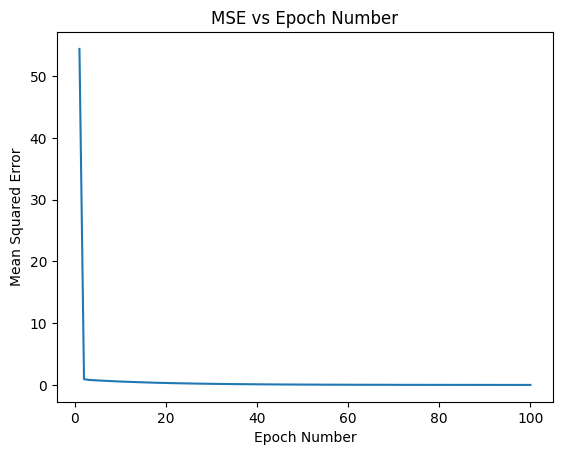

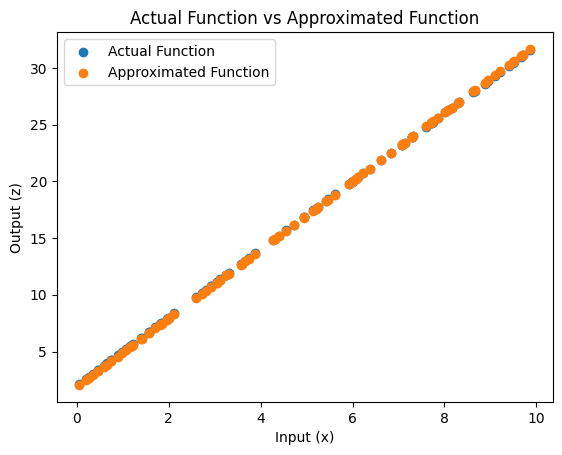

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, input_size, learning_rate, epochs):
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.mse_history = []

    def linear(self, x):
        return x

    def linear_derivative(self, x):
        return 1

    def predict(self, x):
        net_input = np.dot(x, self.weights) + self.bias
        return self.linear(net_input)

    def trainSGD(self, X, y):
        for epoch in range(self.epochs):
            total_mse = 0.0
            indices = np.arange(len(X))
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            Y_shuffled = y[indices]
            for i in range(len(X)):
                prediction = self.predict(X_shuffled[i])
                error = Y_shuffled[i] - prediction
                delta = error * self.linear_derivative(prediction)
                self.weights += self.learning_rate * delta * X_shuffled[i]
                self.bias += self.learning_rate * delta
                total_mse += error ** 2
            mean_mse = total_mse / len(X)
            self.mse_history.append(mean_mse)
            print(f"Epoch {epoch + 1}/{self.epochs}, Mean Squared Error: {mean_mse:.4f}")

if __name__ == "__main__":
    np.random.seed(42)
    num_samples = 100
    x = np.random.uniform(low=0, high=10, size=num_samples)
    z = 3 * x + 2
    data = pd.DataFrame({'x': x, 'z': z})
    F = data.iloc[:, :-1].values
    O = data.iloc[:, -1].values
    input_size = 1
    perceptron = Perceptron(input_size=input_size, learning_rate=0.001, epochs=100)
    perceptron.trainSGD(F, O)

    # Plot MSE with respect to epoch number
    plt.plot(range(1, perceptron.epochs + 1), perceptron.mse_history)
    plt.xlabel('Epoch Number')
    plt.ylabel('Mean Squared Error')
    plt.title('MSE vs Epoch Number')
    plt.show()

    # Plot the actual function and the approximated function
    plt.scatter(x, z, label='Actual Function')
    plt.scatter(x, perceptron.predict(F), label='Approximated Function')
    plt.xlabel('Input (x)')
    plt.ylabel('Output (z)')
    plt.title('Actual Function vs Approximated Function')
    plt.legend()
    plt.show()


Task 6.6: Modify the code in Example 2 to approximate f(x,y) = 2x + 3y

Epoch 1/100, Mean Squared Error: 75.4408
Epoch 2/100, Mean Squared Error: 0.1795
Epoch 3/100, Mean Squared Error: 0.0986
Epoch 4/100, Mean Squared Error: 0.0824
Epoch 5/100, Mean Squared Error: 0.0788
Epoch 6/100, Mean Squared Error: 0.0753
Epoch 7/100, Mean Squared Error: 0.0731
Epoch 8/100, Mean Squared Error: 0.0710
Epoch 9/100, Mean Squared Error: 0.0695
Epoch 10/100, Mean Squared Error: 0.0658
Epoch 11/100, Mean Squared Error: 0.0657
Epoch 12/100, Mean Squared Error: 0.0636
Epoch 13/100, Mean Squared Error: 0.0599
Epoch 14/100, Mean Squared Error: 0.0594
Epoch 15/100, Mean Squared Error: 0.0577
Epoch 16/100, Mean Squared Error: 0.0553
Epoch 17/100, Mean Squared Error: 0.0543
Epoch 18/100, Mean Squared Error: 0.0529
Epoch 19/100, Mean Squared Error: 0.0507
Epoch 20/100, Mean Squared Error: 0.0490
Epoch 21/100, Mean Squared Error: 0.0485
Epoch 22/100, Mean Squared Error: 0.0470
Epoch 23/100, Mean Squared Error: 0.0458
Epoch 24/100, Mean Squared Error: 0.0441
Epoch 25/100, Mean Squar

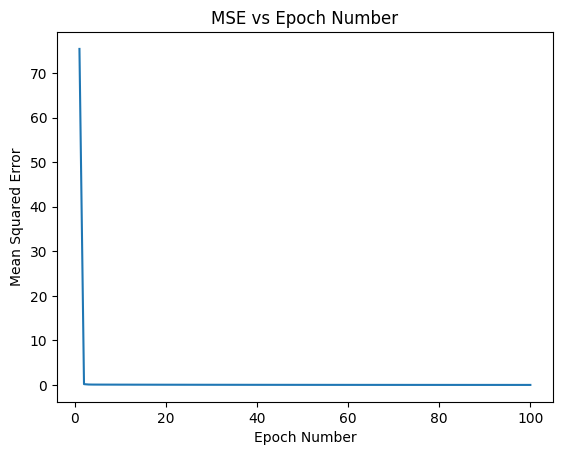

Input (x=3, y=4), Actual: 18, Prediction: 18.06191934583448
Input (x=5, y=6), Actual: 28, Prediction: 28.000917060868797
Input (x=7, y=8), Actual: 38, Prediction: 37.93991477590313


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, input_size, learning_rate, epochs):
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.mse_history = []

    def linear(self, x):
        return x

    def linear_derivative(self, x):
        return 1

    def predict(self, x):
        net_input = np.dot(x, self.weights) + self.bias
        return self.linear(net_input)

    def trainSGD(self, X, y):
        for epoch in range(self.epochs):
            total_mse = 0.0
            indices = np.arange(len(X))
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            Y_shuffled = y[indices]
            for i in range(len(X)):
                prediction = self.predict(X_shuffled[i])
                error = Y_shuffled[i] - prediction
                delta = error * self.linear_derivative(prediction)
                self.weights += self.learning_rate * delta * X_shuffled[i]
                self.bias += self.learning_rate * delta
                total_mse += error ** 2
            mean_mse = total_mse / len(X)
            self.mse_history.append(mean_mse)
            print(f"Epoch {epoch + 1}/{self.epochs}, Mean Squared Error: {mean_mse:.4f}")

if __name__ == "__main__":
    np.random.seed(42)
    num_samples = 100
    x = np.random.uniform(low=0, high=10, size=num_samples)
    y = np.random.uniform(low=0, high=10, size=num_samples)
    z = 2 * x + 3 * y
    data = pd.DataFrame({'x': x, 'y': y, 'z': z})
    F = data.iloc[:, :-1].values
    O = data.iloc[:, -1].values
    input_size = 2  # Two input variables: x and y
    perceptron = Perceptron(input_size=input_size, learning_rate=0.001, epochs=100)
    perceptron.trainSGD(F, O)

    # Plot MSE with respect to epoch number
    plt.plot(range(1, perceptron.epochs + 1), perceptron.mse_history)
    plt.xlabel('Epoch Number')
    plt.ylabel('Mean Squared Error')
    plt.title('MSE vs Epoch Number')
    plt.show()

    # Test the trained model with some data points
    test_x = np.array([3, 5, 7])
    test_y = np.array([4, 6, 8])
    for i in range(len(test_x)):
        prediction = perceptron.predict(np.array([test_x[i], test_y[i]]))
        print(f"Input (x={test_x[i]}, y={test_y[i]}), Actual: {2*test_x[i] + 3*test_y[i]}, Prediction: {prediction}")


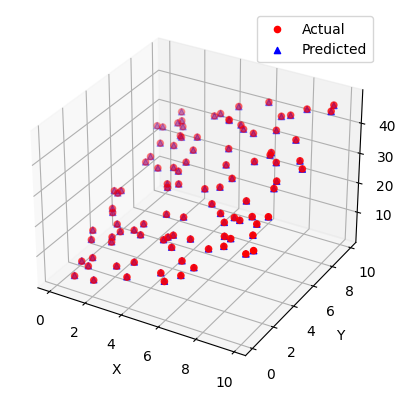

In [ ]:
import matplotlib.pyplot as plt

predictions = []
actual = []

for xx, yy in zip(x, y):
  prediction = perceptron.predict([xx, yy])
  predictions.append(prediction)
  actual.append(2*xx+3*yy)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for training set
ax.scatter(x, y, actual, c='r', marker='o', label='Actual')

# Scatter plot for validation set
ax.scatter(x, y, predictions, c='b', marker='^', label='Predicted')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Add legend
ax.legend()

# Show plot
plt.show()

Task 6.7: Run the code in Example 1 to solve the logical XOR operation with 1000 epochs and compute the accuracy of the tested samples. [note: you need to change the training and testing data to reflect XOR logical operation.]

In [ ]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, learning_rate, epochs):
        # Initialize weights and bias with random values
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()
        # Set learning rate and number of epochs
        self.learning_rate = learning_rate
        self.epochs = epochs

    def step_activation(self, x):
        # Step activation function
        return 1 if x >= 0 else 0

    def predict(self, x):
        # Compute the weighted sum of inputs and bias
        net_input = np.dot(x, self.weights) + self.bias
        # Apply step activation function to the net input
        return self.step_activation(net_input)

    def trainSGD(self, X, y):
        # Training loop
        for epoch in range(self.epochs):
            # Initialize Mean Squared Error for this epoch
            total_mse = 0.0
            # Shuffle the training examples for this epoch
            indices = np.arange(len(X))
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            # Iterate over each shuffled training example
            for i in range(len(X_shuffled)):
                # Make a prediction for the current input
                prediction = self.predict(X_shuffled[i])
                # Compute the error (desired - predicted)
                error = y_shuffled[i] - prediction
                # Update weights and bias using stochastic gradient descent
                self.weights += self.learning_rate * error * X_shuffled[i]
                self.bias += self.learning_rate * error
                # Accumulate the squared error for this example
                total_mse += error ** 2
            # Calculate the mean squared error for this epoch
            mean_mse = total_mse / len(X)
            print(f"Epoch {epoch + 1}/{self.epochs}, Mean Squared Error: {mean_mse:.4f}")

# XOR Training samples
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])  # XOR outputs

# Create a perceptron instance with 2 input neurons
perceptron = Perceptron(input_size=2, learning_rate=0.01, epochs=1000)

# Train the perceptron on the XOR dataset
perceptron.trainSGD(X, y)

# Test the trained perceptron on the testing samples
test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
correct_predictions = 0
for data, label in zip(test_data, y):
    prediction = perceptron.predict(data)
    if prediction == label:
        correct_predictions += 1

accuracy = correct_predictions / len(test_data) * 100
print(f"Accuracy: {accuracy:.2f}%")


Epoch 1/1000, Mean Squared Error: 0.5000
Epoch 2/1000, Mean Squared Error: 0.5000
Epoch 3/1000, Mean Squared Error: 0.5000
Epoch 4/1000, Mean Squared Error: 0.5000
Epoch 5/1000, Mean Squared Error: 0.5000
Epoch 6/1000, Mean Squared Error: 0.5000
Epoch 7/1000, Mean Squared Error: 0.5000
Epoch 8/1000, Mean Squared Error: 0.5000
Epoch 9/1000, Mean Squared Error: 0.5000
Epoch 10/1000, Mean Squared Error: 0.5000
Epoch 11/1000, Mean Squared Error: 0.5000
Epoch 12/1000, Mean Squared Error: 0.5000
Epoch 13/1000, Mean Squared Error: 0.5000
Epoch 14/1000, Mean Squared Error: 0.5000
Epoch 15/1000, Mean Squared Error: 0.5000
Epoch 16/1000, Mean Squared Error: 0.5000
Epoch 17/1000, Mean Squared Error: 0.5000
Epoch 18/1000, Mean Squared Error: 0.5000
Epoch 19/1000, Mean Squared Error: 0.5000
Epoch 20/1000, Mean Squared Error: 0.5000
Epoch 21/1000, Mean Squared Error: 0.5000
Epoch 22/1000, Mean Squared Error: 0.5000
Epoch 23/1000, Mean Squared Error: 0.5000
Epoch 24/1000, Mean Squared Error: 0.5000
E

Task 6.8: Run the code in Example 1 to solve the logical XOR operation with 10000 epochs and compute the accuracy of the tested samples. Does the perceptron perform well on approximating XOR with more epochs? Justify your answer.

In [ ]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, learning_rate, epochs):
        # Initialize weights and bias with random values
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()
        # Set learning rate and number of epochs
        self.learning_rate = learning_rate
        self.epochs = epochs

    def step_activation(self, x):
        # Step activation function
        return 1 if x >= 0 else 0

    def predict(self, x):
        # Compute the weighted sum of inputs and bias
        net_input = np.dot(x, self.weights) + self.bias
        # Apply step activation function to the net input
        return self.step_activation(net_input)

    def trainSGD(self, X, y):
        # Training loop
        for epoch in range(self.epochs):
            # Initialize Mean Squared Error for this epoch
            total_mse = 0.0
            # Shuffle the training examples for this epoch
            indices = np.arange(len(X))
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            # Iterate over each shuffled training example
            for i in range(len(X_shuffled)):
                # Make a prediction for the current input
                prediction = self.predict(X_shuffled[i])
                # Compute the error (desired - predicted)
                error = y_shuffled[i] - prediction
                # Update weights and bias using stochastic gradient descent
                self.weights += self.learning_rate * error * X_shuffled[i]
                self.bias += self.learning_rate * error
                # Accumulate the squared error for this example
                total_mse += error ** 2
            # Calculate the mean squared error for this epoch
            mean_mse = total_mse / len(X)
            print(f"Epoch {epoch + 1}/{self.epochs}, Mean Squared Error: {mean_mse:.4f}")

# XOR Training samples
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])  # XOR outputs

# Create a perceptron instance with 2 input neurons
perceptron = Perceptron(input_size=2, learning_rate=0.01, epochs=10000)

# Train the perceptron on the XOR dataset
perceptron.trainSGD(X, y)

# Test the trained perceptron on the testing samples
test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
correct_predictions = 0
for data, label in zip(test_data, y):
    prediction = perceptron.predict(data)
    if prediction == label:
        correct_predictions += 1

accuracy = correct_predictions / len(test_data) * 100
print(f"Accuracy: {accuracy:.2f}%")



Streaming output truncated to the last 5000 lines.
Epoch 5002/10000, Mean Squared Error: 1.0000
Epoch 5003/10000, Mean Squared Error: 1.0000
Epoch 5004/10000, Mean Squared Error: 0.7500
Epoch 5005/10000, Mean Squared Error: 0.7500
Epoch 5006/10000, Mean Squared Error: 0.7500
Epoch 5007/10000, Mean Squared Error: 1.0000
Epoch 5008/10000, Mean Squared Error: 1.0000
Epoch 5009/10000, Mean Squared Error: 0.5000
Epoch 5010/10000, Mean Squared Error: 1.0000
Epoch 5011/10000, Mean Squared Error: 0.5000
Epoch 5012/10000, Mean Squared Error: 0.7500
Epoch 5013/10000, Mean Squared Error: 1.0000
Epoch 5014/10000, Mean Squared Error: 0.7500
Epoch 5015/10000, Mean Squared Error: 0.5000
Epoch 5016/10000, Mean Squared Error: 0.5000
Epoch 5017/10000, Mean Squared Error: 0.7500
Epoch 5018/10000, Mean Squared Error: 0.7500
Epoch 5019/10000, Mean Squared Error: 0.5000
Epoch 5020/10000, Mean Squared Error: 0.7500
Epoch 5021/10000, Mean Squared Error: 0.5000
Epoch 5022/10000, Mean Squared Error: 1.0000
Epoc